#Import Libraries

In [38]:
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPool2D, MaxPool1D
from tensorflow.keras.layers import Dropout, BatchNormalization

from google.colab import drive

print("Module Loaded.")
print("TensorFlow Version :{}".format(tf.__version__))
print("NumPy Version :{}".format(np.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

Module Loaded.
TensorFlow Version :2.1.0-rc1
NumPy Version :1.17.4
Matplotlib Version :3.1.2


In [39]:
drive.mount('/content/drive')

data_path = pathlib.Path('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture')

num = 0

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
class_name = np.array([item.name for item in data_path.glob('*')])
print(class_name)

['bookshelves' 'fireplace' 'floor lamp' 'chair' 'entertainment center'
 'dressing table' 'bed' 'curtain' 'sofa' 'table']


# Prepare Data

- **Unzip Data**

In [61]:
import os

cwd = os.getcwd()
print(cwd)

!unzip /content/drive/Shared\ drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture.zip -d /content/furniture

/content
Archive:  /content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture.zip
replace /content/furniture/bed/bed (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/furniture/bed/bed (1).jpg  
  inflating: /content/furniture/bed/bed (10).jpg  
  inflating: /content/furniture/bed/bed (100).jpg  
  inflating: /content/furniture/bed/bed (1000).jpg  
  inflating: /content/furniture/bed/bed (1001).jpg  
  inflating: /content/furniture/bed/bed (1002).jpg  
  inflating: /content/furniture/bed/bed (1003).jpg  
  inflating: /content/furniture/bed/bed (1004).jpg  
  inflating: /content/furniture/bed/bed (1005).jpg  
  inflating: /content/furniture/bed/bed (1006).jpg  
  inflating: /content/furniture/bed/bed (1007).jpg  
  inflating: /content/furniture/bed/bed (1008).jpg  
  inflating: /content/furniture/bed/bed (1009).jpg  
  inflating: /content/furniture/bed/bed (101).jpg  
  inflating: /content/furniture/bed/bed (1010).jpg  
  inflating: /content/furni

# Resize Image

In [0]:
# from PIL import Image

# for j in class_name[1:4]:
#     image = pathlib.Path('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data/furniture/'+j)
#     image = list(image.glob('*.jpg'))
#     for i in range(len(image)):
#         im = Image.open(str(image[i])).convert('RGB')
#         resize_image = im.resize((im.size[0]//2,im.size[1]//2))
#         resize_image.save('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture/{0}/{1}{2:03d}.jpg'.format(j,j,i))
#         print(j, i)

In [0]:
# data_path = pathlib.Path('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture')

#ImageGenerator

In [0]:
img_size = 112
batch_n = 256

data_path = pathlib.Path('/content/furniture')

In [0]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
                                width_shift_range=0.3,
                                height_shift_range=0.3,
                                horizontal_flip=True, 
                                #vertical_flip=True,
                                #rotation_range=30,
                                zoom_range=0.1,
                                brightness_range=[0.8,1.2],
                                validation_split=0.2,
                                rescale=1./255)

In [64]:
train_data_generate = image_generator.flow_from_directory(
                        directory=str(data_path),
                        batch_size=batch_n,
                        shuffle=True,
                        target_size=(img_size, img_size),
                        classes = list(class_name),
                        subset='training')
test_data_generate = image_generator.flow_from_directory(
                        directory=str(data_path),
                        batch_size=batch_n,
                        shuffle=True,
                        target_size=(img_size, img_size),
                        classes = list(class_name),
                        subset='validation')

Found 12559 images belonging to 10 classes.
Found 3135 images belonging to 10 classes.


# Load Prev Model

In [0]:
save_path = '/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/code/model_checkpoint/'

In [0]:
# date, epoch, model_name, num
# save_model('day02', epoch=epoch_n, model_name=model_name, num='sey01')

def save_model(date, epoch, model_name, num):
    ai_kea.save(save_path+"aikea_{}_{}_{}_{}.hdf5".format(date, epoch, model_name, num))

In [0]:
def load_aikea(date, epoch, model_name, num):
  model = tf.keras.models.load_model(save_path+"aikea_{}_{}_{}_{}.hdf5".format(date, epoch, model_name, num))
  return model

In [0]:
# prev_aikea = load_aikea('day01', epoch=epoch_n, model_name=model_name, num='sey01')

#Load VGG

import model

In [68]:
import tensorflow.keras.applications.vgg16 as vgg16

model_imported = vgg16.VGG16(
    weights="imagenet", 
    include_top=False,    # dense layer 이 후는 제외
    input_tensor=tf.keras.layers.Input(shape=(img_size, img_size, 3))
    #input_tensor=keras.layers.Input(shape=(49, 49, 3))
)

model_imported.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 112, 112, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 112, 112, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 112, 112, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 56, 56, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 56, 56, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 56, 56, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 28, 28, 128)       0     

##fine tuning

freeze layers

In [69]:
# slicing which layers not to train
for layer in model_imported.layers[:-8] :
  layer.trainable = False

for layer in model_imported.layers :
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fb90663c240> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb90663c278> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb90663c828> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb90663cb38> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb9066ce080> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb906702278> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb906413978> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb906419f28> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb906419ef0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb90641ee80> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb906425da0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

make ai-kea model

In [70]:
ai_kea = tf.keras.models.Sequential()

ai_kea.add(model_imported)

# Here add new layers
ai_kea.add(Flatten())
# ai_kea.add(Dense(1024, activation='relu'))
# model_fine.add(keras.layers.Dropout(0.5))
#model_fine.add(keras.layers.LeakyReLU(alpha=0.1))
# ai_kea.add(BatchNormalization())   # 필히 사용할 것
ai_kea.add(Dense(10, activation='softmax',kernel_initializer='he_uniform'))
ai_kea.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                46090     
Total params: 14,760,778
Trainable params: 13,025,290
Non-trainable params: 1,735,488
_________________________________________________________________


#model compile & train

In [0]:
model_name = 'vgg16' # 불러온 모델 이름
date = 'day02'
epoch_n = 100

In [0]:
def lr_schedule(epoch):
    lr = 1e-2
    if epoch/epoch_n > 0.8:
        lr *= 0.5e-3
    elif epoch/epoch_n > 0.6:
        lr *= 1e-3
    elif epoch/epoch_n > 0.4:
        lr *= 1e-2
    elif epoch/epoch_n > 0.2:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [73]:
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule(0))
lrate = LearningRateScheduler(lr_schedule)
callbacks_list = [lrate]

Learning rate:  0.01


In [0]:
ai_kea.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [75]:
history = ai_kea.fit_generator(
    train_data_generate,
    epochs = epoch_n,
    validation_data = test_data_generate
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 50 steps, validate for 13 steps
Epoch 1/100
50/50 [==============================] - 75s 1s/step - loss: 2.5094 - accuracy: 0.1985 - val_loss: 2.1278 - val_accuracy: 0.2724
Epoch 2/100
50/50 [==============================] - 73s 1s/step - loss: 1.8578 - accuracy: 0.3410 - val_loss: 1.7085 - val_accuracy: 0.3920
Epoch 3/100
50/50 [==============================] - 72s 1s/step - loss: 1.4973 - accuracy: 0.4709 - val_loss: 1.4873 - val_accuracy: 0.4829
Epoch 4/100
50/50 [==============================] - 74s 1s/step - loss: 1.2905 - accuracy: 0.5478 - val_loss: 1.3916 - val_accuracy: 0.5270
Epoch 5/100
50/50 [==============================] - 72s 1s/step - loss: 1.1265 - accuracy: 0.6082 - val_loss: 1.1989 - val_accuracy: 0.5837
Epoch 6/100
50/50 [==============================] - 72s 1s/step - loss: 0.9950 - accuracy: 0.6615 - val_loss: 1.0979 - val_accuracy: 0.6185
Epoch 7/100
50/50 [==============================] - 71s 1s/st

# Save Model

In [77]:
%%time

# date, epoch, model_name, num
save_model(date, epoch=epoch_n, model_name=model_name, num='sey02')

CPU times: user 158 ms, sys: 85.6 ms, total: 244 ms
Wall time: 535 ms


# Plot Learning Status

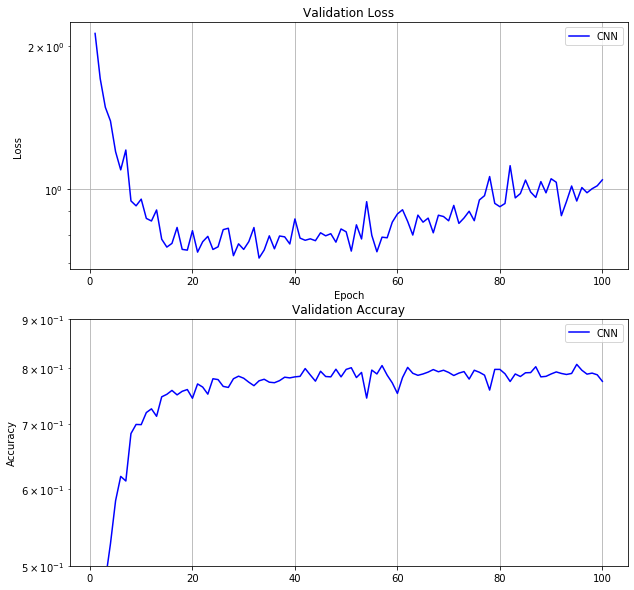

In [78]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.title('Validation Loss')
plt.semilogy(epochs, history.history['val_loss'], 'b', label='CNN')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.0, 0.6])
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Validation Accuray')
plt.semilogy(epochs, history.history['val_accuracy'], 'b', label='CNN')
plt.grid(True)
plt.ylabel('Accuracy')
plt.ylim([0.5, 0.9])
plt.legend(loc='best')
plt.show()

In [79]:
print(np.max(history.history['val_accuracy']))

0.8073365


> ### CAM

- make Model Function

In [80]:
import cv2
from keras.applications.vgg16 import decode_predictions

def buildCAM(img_path, img_alpha, heatmap_alpha): # 0<= alpha <=1

    # load the image with the required shape
    img = image.load_img(img_path, target_size=(224, 224))
    # check image
    plt.imshow(img)
    # convert the image to an array
    img = image.img_to_array(img)         # tf.keras.processing
    # expand dimensions so that it represents a single 'sample'
    img = np.expand_dims(img, axis=0)     # numpy
    # prepare the image (e.g. scale pixel values for the vgg)
    img = vgg16.preprocess_input(img)     # VGG16.preprocess_input


    grad_model = tf.keras.models.Model(
      [ai_kea.inputs],                           # input: vgg16 inputs
      [ai_kea.get_layer('block5_conv3').output,  # outputs: vgg16 last conv
      ai_kea.output]                            # softmax out
    )


    # GradientTape 설정
    with tf.GradientTape() as tape:
        conv_outputs, predict = grad_model(img)   # feature, predict
        class_out = predict[:, np.argmax(predict[0])]    # class     

    # feature map
    output = conv_outputs[0]

    # Get gradient for input image
    grads = tape.gradient(class_out, conv_outputs)[0]

    # check grads' shape
    grads.shape, output.shape

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=(0, 1))


    # Build a map of filters according to gradients importance
    cam = np.ones(output.shape[0:2], dtype=np.float32)

    for index, w in enumerate(weights):
        cam += w * output[:, :, index]

    # check cam shape
    cam.shape, weights.shape


    # image read: ndarray type
    img = cv2.imread(img_path)
    # GBR -> RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # cv2는 기본적으로 image를 GBR로 처리

    plt.imshow(img)

    img.shape, type(img)


    # resize cam
    cam = cv2.resize(cam.numpy(), (img.shape[1], img.shape[0]))
    cam = np.maximum(cam, 0)          # 0 이상의 값만 취함
    # heatmap : minmax normalized one
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())

    # convert heatmap to rgb
    heatmap = np.uint8(255 * heatmap)                       # RGB range (0~255)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # apply color map
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)      # colormap to RGB

    # get heatmap outline
    heatlist = heatmap.tolist()
    t_pos = []
    for i in range(len(heatlist)):
      for j in range(len(heatlist[i])):
        if heatlist[i][j][2]<125: t_pos.append((i, j))

    y_max = max([i[0] for i in t_pos])
    y_min = min([i[0] for i in t_pos])
    x_max = max([i[1] for i in t_pos])
    x_min = min([i[1] for i in t_pos])


    # check heatmap shape
    plt.imshow(heatmap)
    heatmap.shape #(426, 640, 3)

    # blending heatmap: image: 100%, heatmap: 50%
    output_image = cv2.addWeighted(img.astype('uint8'), img_alpha,  # 1: 100%
                                  heatmap, heatmap_alpha,            # 0.5: 50%
                                  0)
    return output_image, y_min, x_min, y_max-y_min, x_max-x_min

Using TensorFlow backend.


In [0]:
img_path = '/content/furniture/table/table.jpg'

In [87]:
from tensorflow.keras.preprocessing import image

# define Model
output_image, yy, xx, h, w = buildCAM(img_path, 1, 0)

# import matplotlib.patches as patches
# fig, ax = plt.subplots(1)
rect = pathces.Rectangle((xx, yy), w, h, linewidth=1, edgecolor='r', facecolor='none')
# ax.add_patch(rect)
# ax.imshow(output_image)
# plot blended image
rect_txt = patches.Rectangle((xx,yy-20), 100, 20, edgecolor='r', facecolor='r')
plt.add_patch(rect)
plt.add_patch(rect_txt)
plt.text(xx, yy, 
         '{}-{}%'.format(decode_predictions(preds, top=2)[0][0][1], decode_predictions(preds, top=2)[0][0][0]),
         fontsize=10)
plt.imshow(output_image)
plt.axis('off')
plt.title(decode_predictions(preds, top=2)[0][0][1])

FileNotFoundError: ignored